In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Chicago_Crime_Detective.csv' , index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(10)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
5,8950793,12/31/12 20:30,STREET,True,False,2521,25,19,2012
6,8950760,12/31/12 20:10,STREET,False,False,423,4,48,2012
7,8951611,12/31/12 20:00,STREET,False,False,231,2,40,2012
8,8951802,12/31/12 19:00,STREET,True,False,1021,10,29,2012
9,8950706,12/31/12 18:00,STREET,False,False,1215,12,24,2012


In [11]:
df.Date.isnull().sum()

0

In [49]:
df.Date[len(df.Date)//2]

'5/21/06 12:30'

In [38]:
df['Time'] = pd.to_datetime(df.Date)

In [24]:
df.Time.dt.month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Time, dtype: int64

In [26]:
df.Time.dt.dayofweek.value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: Time, dtype: int64

In [50]:
df[df['Arrest']]

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Time
5,8950793,12/31/12 20:30,STREET,True,False,2521,25,19,2012,2012-12-31 20:30:00
8,8951802,12/31/12 19:00,STREET,True,False,1021,10,29,2012,2012-12-31 19:00:00
13,8950570,12/31/12 16:20,GAS STATION,True,False,825,8,66,2012,2012-12-31 16:20:00
47,8949895,12/30/12 19:46,ALLEY,True,False,2512,25,18,2012,2012-12-30 19:46:00
59,8949557,12/30/12 15:00,STREET,True,False,2535,25,23,2012,2012-12-30 15:00:00
...,...,...,...,...,...,...,...,...,...,...
191600,1311345,1/1/01 18:30,STREET,True,False,323,NaN,NaN,2001,2001-01-01 18:30:00
191601,1311051,1/1/01 18:00,STREET,True,False,132,NaN,NaN,2001,2001-01-01 18:00:00
191607,1312461,1/1/01 16:00,STREET,True,False,1413,NaN,NaN,2001,2001-01-01 16:00:00
191628,1310725,1/1/01 3:00,STREET,True,False,822,NaN,NaN,2001,2001-01-01 03:00:00


In [41]:
df[df['Arrest']].Time.dt.month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Time, dtype: int64

(array([20669., 18753., 16657., 16862., 16484., 16098., 14280., 14445.,
        12167., 15497., 15637., 14092.]),
 array([2001.        , 2001.91666667, 2002.83333333, 2003.75      ,
        2004.66666667, 2005.58333333, 2006.5       , 2007.41666667,
        2008.33333333, 2009.25      , 2010.16666667, 2011.08333333,
        2012.        ]),
 <a list of 12 Patch objects>)

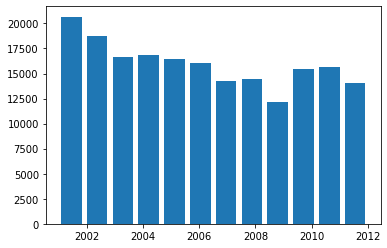

In [51]:
plt.hist(df.Time.dt.year  , histtype='bar' , bins=12 , rwidth = 0.8)

(array([10588.,  4948.]),
 array([2001. , 2006.5, 2012. ]),
 <a list of 2 Patch objects>)

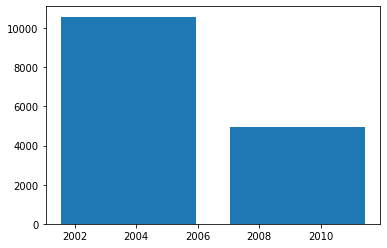

In [53]:
plt.hist(df[df['Arrest']].Time.dt.year  , histtype='bar' , bins=2 , rwidth = 0.8)

In [64]:
df[(df['Arrest']) & (df.Time.dt.year == 2001) ].Date.count()

2152

In [57]:
df[df.Time.dt.year == 2001].Date.count()

20669

In [59]:
2152/20669

0.10411727708161982

In [65]:
df[(df['Arrest']) & (df.Time.dt.year == 2007) ].Date.count()/df[df.Time.dt.year == 2007].Date.count()

0.08487394957983194

In [68]:
df.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [76]:
df[df.LocationDescription.isin(['STREET' , 'PARKING LOT/GARAGE(NON.RESID.)' , 'ALLEY' , 'GAS STATION' , 'DRIVEWAY - RESIDENTIAL'])].count()

ID                     177510
Date                   177510
LocationDescription    177510
Arrest                 177510
Domestic               177510
Beat                   177510
District               137526
CommunityArea          154663
Year                   177510
Time                   177510
dtype: int64

In [82]:
df[df.LocationDescription.isin(['GAS STATION'])].Time.dt.dayofweek.value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: Time, dtype: int64